# Plot sMAPE

In [57]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import os, sys
sys.path.append('/home/clb/AQP/')
from utils import load_table
src_df = load_table("lineitem")
print(src_df.shape)


(6001215, 8)


# Plot all err


(400, 29)
(1600, 29)
(448, 29)


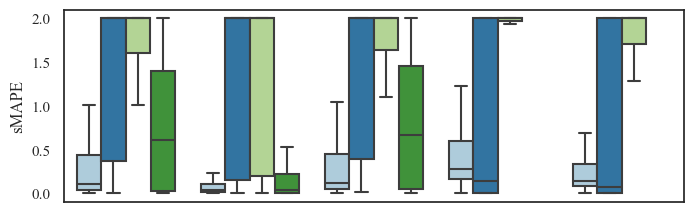

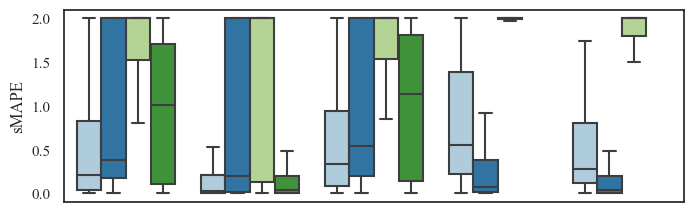

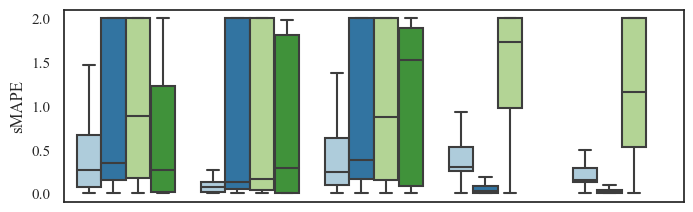

In [24]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
n_pred_tresh = [1, 10]
ratio = 3.5
high = 2.5
for i, dataset in enumerate(['flights', 'pm25', 'lineitemext']):
    df = pd.read_csv(f'/home/clb/AQP/output/flow-tiny-{dataset}-spline/eval-vary.csv')
    df = df[df['n_predicates'] >= n_pred_tresh[0]]
    df = df[df['n_predicates'] <= n_pred_tresh[1]]
    print(df.shape)
    methods = ['flow', 'verdict', 'vae', 'deepdb']
    funcs = ['cnt', 'avg', 'sum', 'var', 'std']

    methods_alias = {a: b for a, b in zip(methods, ['NFAQP', 'VerdictDB', 'VAE-AQP', 'DeepDB'])}
    funcs_alias = {a: b for a, b in zip(funcs, ['COUNT', 'AVG', 'SUM', 'VARIANCE', 'STDDEV'])}

    plot_df = pd.DataFrame([], columns=['Methods', 'Aggregation Functions', 'sMAPE'])

    N = df.shape[0]
    for m in methods:
        for f in funcs:
            if m == 'deepdb' and f in ['var', 'std']:
                continue
            err_col = df [f'{m}_{f}_err']
            sub_df = pd.DataFrame([[funcs_alias[f]] * N, [methods_alias[m]] * N, err_col]).transpose()
            sub_df.columns = plot_df.columns
            plot_df = pd.concat([plot_df, sub_df])


    fig = plt.figure(figsize=(int(high * ratio), high))
    sns.set(font="Times New Roman", style='white', palette="Paired", font_scale=1)
    latency_ax = sns.boxplot(x="Methods", y="sMAPE",
                    hue="Aggregation Functions", showfliers=False, palette="Paired",
                    data=plot_df)
    
    latency_ax.get_legend().remove()
    latency_ax.set(xlabel=None)
    latency_ax.set_xticklabels([])

    # if i != 2:
    #     ax.set_xticklabels([])
    # if i != 0:
    #     ax.get_legend().remove()
    # else:
    #     sns.move_legend(ax, 'lower center', bbox_to_anchor=(.5, 1), ncol=4, title=None, frameon=True)
    #     pass
    sns.set_style("whitegrid") # 白色网格背景
    

    plt.savefig(f"./err/{dataset}_err.pdf", format="pdf", dpi=1200, bbox_inches="tight")


# Vary Num Predicates

['1 (45.60%)', '2 (19.58%)', '3 (8.91%)', '4 (2.90%)', '5 (1.21%)', '6 (0.35%)', '7 (0.14%)', '8 (0.03%)']
['1 (45.60%)', '2 (19.58%)', '3 (8.91%)', '4 (2.90%)', '5 (1.21%)', '6 (0.35%)', '7 (0.14%)', '8 (0.03%)']
['1 (45.60%)', '2 (19.58%)', '3 (8.91%)', '4 (2.90%)', '5 (1.21%)', '6 (0.35%)', '7 (0.14%)', '8 (0.03%)']


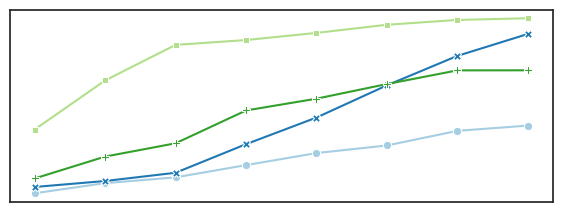

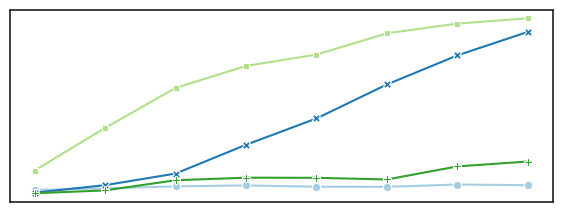

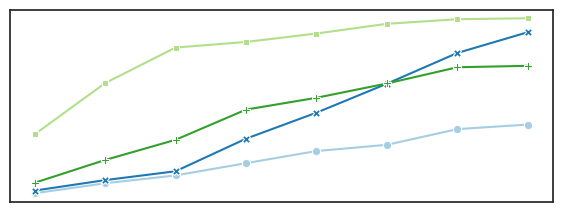

In [25]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
ratio = 3
high = 2.5
dataset = 'pm25'
df = pd.read_csv(f'/home/clb/AQP/output/flow-tiny-{dataset}-spline/eval-vary.csv')
df['selectivity'] *= 100
methods = ['flow', 'verdict', 'vae', 'deepdb']
funcs = ['cnt', 'avg', 'sum', 'var', 'std']
methods_alias = {a: b for a, b in zip(methods, ['NFAQP', 'VerdictDB', 'VAE', 'DeepDB'])}
funcs_alias = {a: b for a, b in zip(funcs, ['COUNT', 'AVG', 'SUM', 'VAR', 'STD'])}
for idx, func in enumerate(['cnt', 'avg', 'sum']):
    x = list(range(1, df['n_predicates'].max() + 1))    # num of pred
    y = {m:[] for m in methods}
    sels = []
    for n in x:
        sub_df = df[df['n_predicates'] == n].mean()
        sels.append(sub_df['selectivity'])
        for m in methods:
            for f in funcs:
                if f != func:
                    continue;
                if m == 'deepdb' and f in ['var', 'std']:
                    continue
                err = sub_df[f'{m}_{f}_err']
                y[m].append(err)

    plot_df = []
    for m in methods:
        for a, b, s in zip(x, y[m], sels):
            plot_df.append([s, a, b, methods_alias[m]])

    plot_df = pd.DataFrame(plot_df, columns=["Selectivity", "Number of Predicates", 'Mean sMAPE', 'Methods'])


    fig = plt.figure(figsize=(int(high * ratio), high))
    sns.set(font="Times New Roman", style='white', palette="Paired")
    # sns.despine()
    latency_ax = sns.lineplot(
        data=plot_df,
        x="Number of Predicates", y="Mean sMAPE", hue="Methods", style="Methods",
        markers=True, dashes=False, errorbar=('ci', False)
    )

    # ax.set_xticks(x)
    # ax.set_xticklabels([f"{n_p} ({s:.2f}%)" for n_p, s in zip(x, sels)])
    # ax.set_xlabel("Number of Predicates  (Mean Selectivity)") # 设置x轴标签
    print([f"{n_p} ({s:.2f}%)" for n_p, s in zip(x, sels)])
    
    latency_ax.set_ylabel("")
    latency_ax.set_yticklabels([])

    # remove all elements 
    latency_ax.get_legend().remove()
    latency_ax.set_xticks([])
    latency_ax.set_xlabel("") # 设置x轴标签

    # if idx == 0:
    #     sns.move_legend(ax, 'lower center', bbox_to_anchor=(.5, 1), ncol=4, title=None, frameon=True)
    # else:
    #     ax.get_legend().remove()
    # print([f"{n_p} ({s:.2f}%)" for n_p, s in zip(x, sels)])
    # if idx == 2:
    #     # ax.set_xticklabels([f"{n_p} ({s:.2f}%)" for n_p, s in zip(x, sels)])
    #     # ax.set_xlabel("Number of Predicates  (Mean Selectivity)") # 设置x轴标签
    #     ax.set_xticks(x)
    #     ax.set_xticklabels([f"{n_p}" for n_p, s in zip(x, sels)])
    #     ax.set_xlabel("Number of Predicates") # 设置x轴标签
    # else:
    #     ax.set_xticks([])
    #     ax.set_xlabel("") # 设置x轴标签
    plt.savefig(f"./vary/{func}.pdf", format="pdf", dpi=1200, bbox_inches="tight")



# Plot group by err


In [27]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
n_pred_tresh = 5
ratio = 3.5
high = 2.5



for i, dataset in enumerate(['lineitemext']):
    df = pd.read_csv(f'/home/clb/AQP/output/flow-tiny-{dataset}-spline/eval-groupby.csv')
    # df = df[df['n_predicates'] <= n_pred_tresh]
    methods = ['flow', 'verdict', 'vae', 'deepdb']
    funcs = ['cnt', 'avg', 'sum', 'var', 'std']

    methods_alias = {a: b for a, b in zip(methods, ['NFAQP', 'VerdictDB', 'VAE-AQP', 'DeepDB'])}
    funcs_alias = {a: b for a, b in zip(funcs, ['COUNT', 'AVG', 'SUM', 'VARIANCE', 'STDDEV'])}

    plot_df = pd.DataFrame([], columns=['Methods', 'Aggregation Functions', 'sMAPE'])

    N = df.shape[0]
    for m in methods:
        for f in funcs:
            if m == 'deepdb' and f in ['var', 'std']:
                continue
            err_col = df [f'{m}_{f}_err']
            sub_df = pd.DataFrame([[funcs_alias[f]] * N, [methods_alias[m]] * N, err_col]).transpose()
            sub_df.columns = plot_df.columns
            plot_df = pd.concat([plot_df, sub_df])


    fig = plt.figure(figsize=(int(high * ratio), high))
    sns.set(font="Times New Roman", style='white', palette="Paired", font_scale=1)
    groupby_ax = sns.boxplot(x="Methods", y="sMAPE",
                    hue="Aggregation Functions", showfliers=False, palette="Paired",
                    data=plot_df)
    groupby_ax.set(xlabel=None)
    if i != 2:
        groupby_ax.set_xticklabels([])
    if i != 0:
        groupby_ax.get_legend().remove()
    else:
        sns.move_legend(groupby_ax, 'lower center', bbox_to_anchor=(.5, 1), ncol=4, title=None, frameon=True)
        pass
    sns.set_style("whitegrid") # 白色网格背景
    
    plt.savefig(f"./err/{dataset}_groupby_err.pdf", format="pdf", dpi=1200, bbox_inches="tight")


FileNotFoundError: [Errno 2] No such file or directory: '/home/clb/AQP/output/flow-tiny-lineitemext-spline/eval-groupby.csv'

In [38]:
print(fig)

Figure(800x250)


# Plot Latency

/home/clb/anaconda3/envs/deepdb/lib/python3.9/site-packages/seaborn/categorical.py:3025: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try stripplot
  warnings.warn(msg, UserWarning)
/home/clb/anaconda3/envs/deepdb/lib/python3.9/site-packages/seaborn/categorical.py:3025: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try stripplot
  warnings.warn(msg, UserWarning)


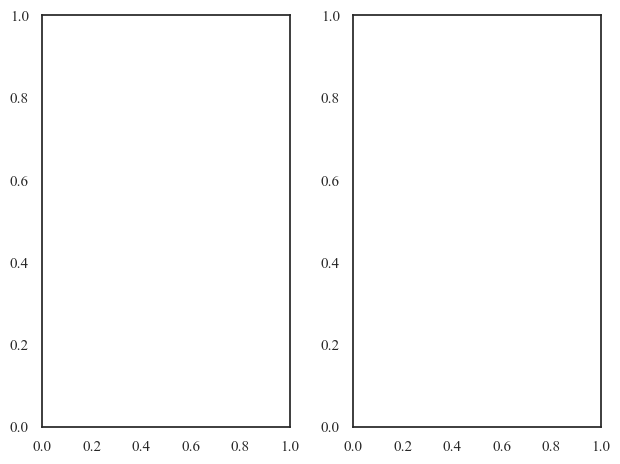

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

exercise = sns.load_dataset("exercise")

fig = plt.figure()

ax1 = fig.add_subplot(121)
g = sns.catplot(x="time", y="pulse", hue="kind", data=exercise, ax=ax1) # pass ax1

ax2 = fig.add_subplot(122)
g = sns.catplot(x="time", y="pulse", hue="kind", data=exercise, ax=ax2) # pass ax2

plt.close(2)
plt.close(3)
plt.tight_layout()

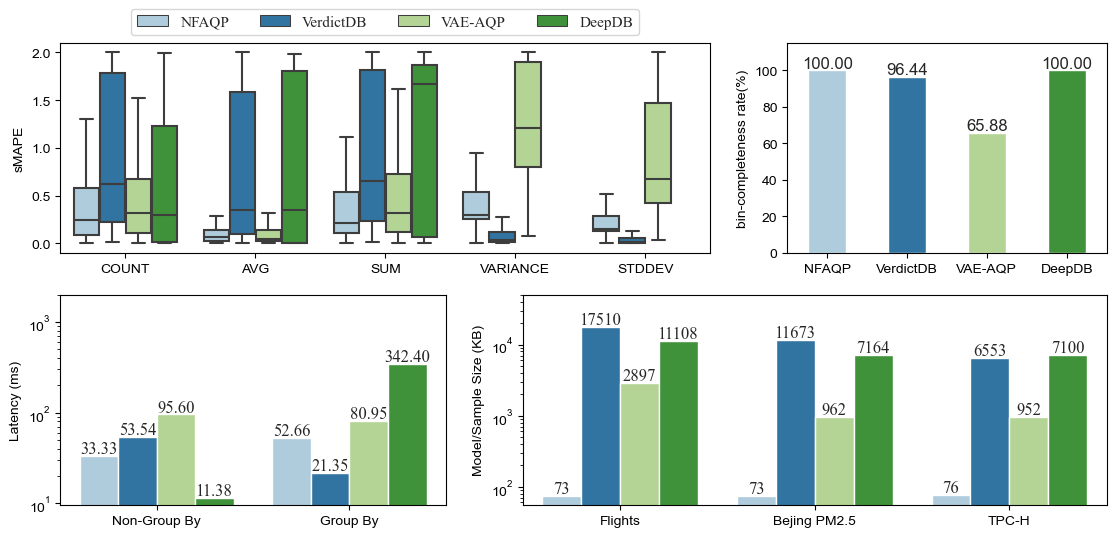

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.gridspec import GridSpec
ratio = 4.5
high = 3
# fig, (latency_ax, space_ax) = plt.subplots(ncols=2, figsize=(ratio * high, high * 2),
#                                 gridspec_kw={'width_ratios': [2, 3]})

fig = plt.figure(figsize=(ratio * high, high * 2))
gs = GridSpec(2, 16)
groupby_ax = plt.subplot(gs[0, :10])
bin_cmp_ax = plt.subplot(gs[0, 11:])
latency_ax = plt.subplot(gs[1, :6])
space_ax = plt.subplot(gs[1, 7:])


for i, dataset in enumerate(['lineitemext']):
    df = pd.read_csv(f'/home/clb/AQP/output/flow-tiny-{dataset}-spline/eval-groupby-vary.csv')
    # df = df[df['n_predicates'] <= n_pred_tresh]
    methods = ['flow', 'verdict', 'vae', 'deepdb']
    funcs = ['cnt', 'avg', 'sum', 'var', 'std']

    methods_alias = {a: b for a, b in zip(methods, ['NFAQP', 'VerdictDB', 'VAE-AQP', 'DeepDB'])}
    funcs_alias = {a: b for a, b in zip(funcs, ['COUNT', 'AVG', 'SUM', 'VARIANCE', 'STDDEV'])}

    plot_df = pd.DataFrame([], columns=['Methods', 'Aggregation Functions', 'sMAPE'])

    N = df.shape[0]
    for m in methods:
        for f in funcs:
            if m == 'deepdb' and f in ['var', 'std']:
                continue
            err_col = df [f'{m}_{f}_err']
            sub_df = pd.DataFrame([[funcs_alias[f]] * N, [methods_alias[m]] * N, err_col]).transpose()
            sub_df.columns = plot_df.columns
            plot_df = pd.concat([plot_df, sub_df])

    sns.set(font="Times New Roman", style='white', palette="Paired", font_scale=1)
    sns.boxplot(x="Methods", y="sMAPE",
                    hue="Aggregation Functions", showfliers=False, palette="Paired",
                    data=plot_df, ax=groupby_ax)
    groupby_ax.set(xlabel='')
    # if i != 2:
    #     groupby_ax.set_xticklabels([])
    if i != 0:
        groupby_ax.get_legend().remove()
    else:
        sns.move_legend(groupby_ax, 'lower center', bbox_to_anchor=(.5, 1), ncol=4, title=None)
        pass
    sns.set_style("whitegrid") # 白色网格背景



bin_cmp = [100, 96.44, 65.88, 100]
sns.barplot(
        x=['NFAQP', 'VerdictDB', 'VAE-AQP', 'DeepDB'], y=bin_cmp,
        palette="Paired", alpha=1.0, ax=bin_cmp_ax
    )
for p in bin_cmp_ax.patches:
    height = p.get_height()
    bin_cmp_ax.annotate(f"{height:.2f}", (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')
# latency_ax.set_yscale('log')
for bar in bin_cmp_ax.patches:
    x = bar.get_x()
    width = bar.get_width()
    centre = x+width/2.
    newwidth = width * 0.6
    bar.set_x(centre - newwidth/2.)
    bar.set_width(newwidth)

bin_cmp_ax.set_ylim(top=115)
bin_cmp_ax.set_ylabel("bin-completeness rate(%)")
# sns.move_legend(space_ax, 'lower center', bbox_to_anchor=(.5, 1), ncol=4, title=None)


plot_df = []
for i, dataset in enumerate(['lineitemext']):
    
    df = pd.read_csv(f'/home/clb/AQP/output/flow-tiny-{dataset}-spline/eval-vary.csv')
    methods = ['flow', 'verdict', 'vae', 'deepdb']
    methods_alias = {a: b for a, b in zip(methods, ['NFAQP', 'VerdictDB', 'VAE-AQP', 'DeepDB'])}
    df = df.mean()
    x = [methods_alias[m] for m in methods]
    y = [df[f'{m}_latency'] for m in methods]
    for x_i, y_i in zip(x, y):
        plot_df.append((y_i, x_i, 'Non-Group By'))

    ###############################################
    df = pd.read_csv(f'/home/clb/AQP/output/flow-tiny-{dataset}-spline/eval-groupby-vary.csv')
    df = df.mean()
    x = [methods_alias[m] for m in methods]
    y = [df[f'{m}_latency'] for m in methods]
    for x_i, y_i in zip(x, y):
        plot_df.append((y_i, x_i, 'Group By'))




    plot_df = pd.DataFrame(plot_df, columns=['Latency (ms)', 'Methods', 'IsGroupBy'])

    # fig = plt.figure(figsize=(int(high * ratio), high))
    sns.set(font="Times New Roman", style='white', palette="Paired", font_scale=1)
    # latency_ax = sns.catplot(
    #     data=plot_df, kind="bar",
    #     x="IsGroupBy", y="Latency", hue="Methods",
    #     palette="Paired", alpha=1.0, legend=False
    # )
    sns.barplot(
        data=plot_df,
        x="IsGroupBy", y="Latency (ms)", hue="Methods",
        palette="Paired", alpha=1.0, ax=latency_ax
    )
    latency_ax.get_legend().remove()
    # 在每个条形上方添加数值标示
    for p in latency_ax.patches:
        height = p.get_height()
        latency_ax.annotate(f"{height:.2f}", (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', xytext=(0, 5), textcoords='offset points')
    latency_ax.set_yscale('log')
    latency_ax.set_ylim(top=2000)
    # latency_ax.set_yscale('log')
    latency_ax.set_xlabel("")



size_df = pd.DataFrame(
        [
            ["NFAQP", 73, 'Flights'], 
            ["VerdictDB", 17510, 'Flights'], 
            ['VAE-AQP', 2897, 'Flights'],
            ['DeepDB', 11108, 'Flights'],

            ["NFAQP", 73, 'Bejing PM2.5'], 
            ["VerdictDB", 11673, 'Bejing PM2.5'], 
            ['VAE-AQP', 962, 'Bejing PM2.5'],
            ['DeepDB', 7164, 'Bejing PM2.5'],

            ["NFAQP", 76, 'TPC-H'], 
            ["VerdictDB", 6553, 'TPC-H'], 
            ['VAE-AQP', 952, 'TPC-H'],
            ['DeepDB', 7100, 'TPC-H'],
        ],
        columns=['Methods', 'Model/Sample Size (KB)', 'Dataset']
    )

sns.barplot(
        data=size_df,
        x="Dataset", y="Model/Sample Size (KB)", hue='Methods',
        palette="Paired", alpha=1.0, ax=space_ax
    )
for p in space_ax.patches:
        height = p.get_height()
        space_ax.annotate(f"{int(height)}", (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', xytext=(0, 5), textcoords='offset points')
        # space_ax.text(p.get_x() + p.get_width() / 2., p.get_height(), int(p.get_height()), ha='center')
space_ax.set_yscale('log')
space_ax.get_legend().remove()
# sns.move_legend(space_ax, 'lower center', bbox_to_anchor=(.5, 1), ncol=4, title=None)
space_ax.set_ylim(top=50000)
space_ax.set_xlabel("")



# latency_ax.set_yscale('log')
# latency_ax.set_xlabel("")



plt.savefig(f"./latency_and_space.pdf", format="pdf", dpi=1200, bbox_inches="tight")

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

titanic = sns.load_dataset("titanic")
sns.set(style="whitegrid")

# 绘制分组柱状图
sns.barplot(x="class", y="survived", hue="sex", data=titanic, ci=None)

plt.show()

# Combine Groupby and Latency

/home/clb/anaconda3/envs/deepdb/lib/python3.9/site-packages/seaborn/categorical.py:3025: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try barplot
  warnings.warn(msg, UserWarning)


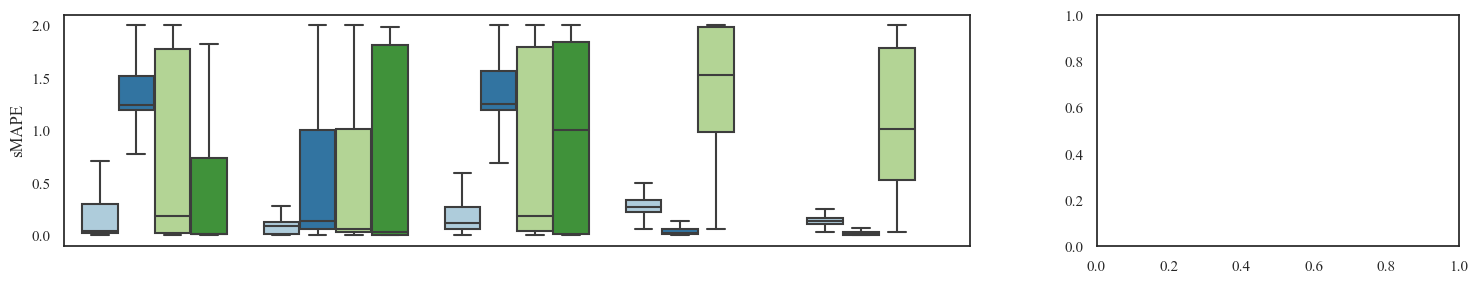

<Figure size 800x250 with 0 Axes>

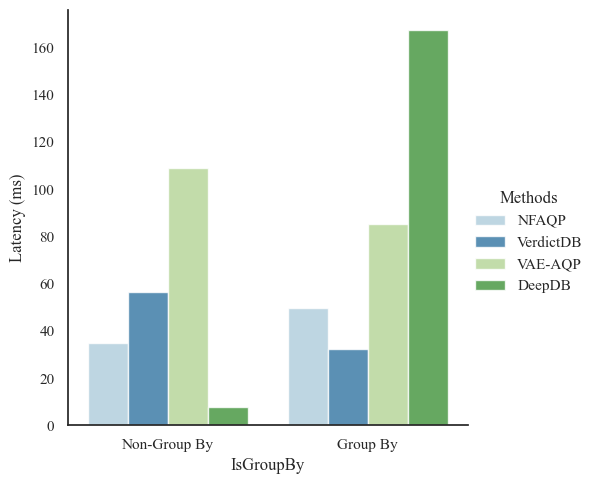

In [5]:
import matplotlib.pyplot as plt

# 创建两个绘图对象 ax1 和 ax2，并使它们的宽度之和等于 8 英寸
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(3 * 6, 3),
                                gridspec_kw={'width_ratios': [5, 2]})

# 在 ax1 和 ax2 上分别绘制图形

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
n_pred_tresh = 5
ratio = 3.5
high = 2.5
for i, dataset in enumerate(['lineitemext']):
    df = pd.read_csv(f'/home/clb/AQP/output/flow-tiny-{dataset}-spline/eval-groupby-vary.csv')
    # df = df[df['n_predicates'] <= n_pred_tresh]
    methods = ['flow', 'verdict', 'vae', 'deepdb']
    funcs = ['cnt', 'avg', 'sum', 'var', 'std']

    methods_alias = {a: b for a, b in zip(methods, ['NFAQP', 'VerdictDB', 'VAE-AQP', 'DeepDB'])}
    funcs_alias = {a: b for a, b in zip(funcs, ['COUNT', 'AVG', 'SUM', 'VARIANCE', 'STDDEV'])}

    plot_df = pd.DataFrame([], columns=['Methods', 'Aggregation Functions', 'sMAPE'])

    N = df.shape[0]
    for m in methods:
        for f in funcs:
            if m == 'deepdb' and f in ['var', 'std']:
                continue
            err_col = df [f'{m}_{f}_err']
            sub_df = pd.DataFrame([[funcs_alias[f]] * N, [methods_alias[m]] * N, err_col]).transpose()
            sub_df.columns = plot_df.columns
            plot_df = pd.concat([plot_df, sub_df])


    fig = plt.figure(figsize=(int(high * ratio), high))
    sns.set(font="Times New Roman", style='white', palette="Paired", font_scale=1)
    sns.boxplot(x="Methods", y="sMAPE",
                    hue="Aggregation Functions", showfliers=False, palette="Paired",
                    data=plot_df, ax=ax1)
    ax1.set(xlabel=None)
    # if i != 2:
    #     ax1.set_xticklabels([])
    # if i != 0:
    #     ax1.get_legend().remove()
    # else:
    #     sns.move_legend(ax1, 'lower center', bbox_to_anchor=(.5, 1), ncol=4, title=None, frameon=True)
    #     pass

    ax1.get_legend().remove()
    ax1.set(xlabel=None)
    ax1.set_xticklabels([])
    sns.set_style("whitegrid") # 白色网格背景

##############################################################################################################################################################################################

for i, dataset in enumerate(['lineitemext']):
    plot_df = []
    df = pd.read_csv(f'/home/clb/AQP/output/flow-tiny-{dataset}-spline/eval.csv')
    methods = ['flow', 'verdict', 'vae', 'deepdb']
    methods_alias = {a: b for a, b in zip(methods, ['NFAQP', 'VerdictDB', 'VAE-AQP', 'DeepDB'])}
    df = df.mean()
    x = [methods_alias[m] for m in methods]
    y = [df[f'{m}_latency'] for m in methods]
    for x_i, y_i in zip(x, y):
        plot_df.append((y_i, x_i, 'Non-Group By'))

    ###############################################
    df = pd.read_csv(f'/home/clb/AQP/output/flow-tiny-{dataset}-spline/eval-groupby.csv')
    df = df.mean()
    x = [methods_alias[m] for m in methods]
    y = [df[f'{m}_latency'] for m in methods]
    for x_i, y_i in zip(x, y):
        plot_df.append((y_i, x_i, 'Group By'))

    plot_df = pd.DataFrame(plot_df, columns=['Latency (ms)', 'Methods', 'IsGroupBy'])

    # fig = plt.figure(figsize=(int(high * ratio), high))
    sns.set(font="Times New Roman", style='white', palette="Paired", font_scale=1)
    sns.catplot(
        data=plot_df, kind="bar",
        x="IsGroupBy", y="Latency (ms)", hue="Methods",
        palette="Paired", alpha=1.0, ax=ax2
    )
    # plt.yscale("log")
    
    # ax2.set_ylabel('Latency (ms)')
    



# 保存 PDF 文件，设置 dpi 和 bbox_inches 参数
# plt.savefig("plot.pdf", dpi=300, bbox_inches='tight')

# Orther

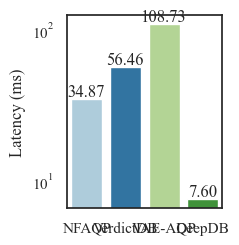

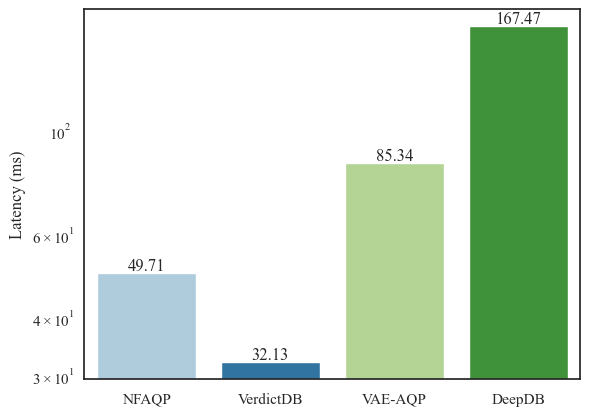

<Figure size 640x480 with 0 Axes>

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
ratio = 1
high = 2.5
fig = plt.figure(figsize=(int(high * ratio), high))

for i, dataset in enumerate(['lineitemext']):
    plot_df = []
    
    df = pd.read_csv(f'/home/clb/AQP/output/flow-tiny-{dataset}-spline/eval.csv')
    # df = df[df['n_predicates'] <= n_pred_tresh]
    methods = ['flow', 'verdict', 'vae', 'deepdb']
    methods_alias = {a: b for a, b in zip(methods, ['NFAQP', 'VerdictDB', 'VAE-AQP', 'DeepDB'])}
    df = df.mean()
    x = [methods_alias[m] for m in methods]
    y = [df[f'{m}_latency'] for m in methods]
    sns.set(font="Times New Roman", style='white', palette="Paired", font_scale=1)
    latency_ax = sns.barplot(x=x, y=y, palette='Paired')
    plt.yscale("log")
    plt.ylabel('Latency (ms)')
    # plt.yticks([10, 100, 1000])
    # 在每个条形上方添加数值标示
    for p in latency_ax.patches:
        height = p.get_height()
        latency_ax.annotate(f"{height:.2f}", (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', xytext=(0, 5), textcoords='offset points')
    plt.show()
    plt.savefig(f"./latency/{dataset}.pdf", format="pdf", dpi=1200, bbox_inches="tight")

    ###############################################
    df = pd.read_csv(f'/home/clb/AQP/output/flow-tiny-{dataset}-spline/eval-groupby.csv')
    # df = df[df['n_predicates'] <= n_pred_tresh]
    methods = ['flow', 'verdict', 'vae', 'deepdb']
    methods_alias = {a: b for a, b in zip(methods, ['NFAQP', 'VerdictDB', 'VAE-AQP', 'DeepDB'])}
    df = df.mean()
    x = [methods_alias[m] for m in methods]
    y = [df[f'{m}_latency'] for m in methods]
    sns.set(font="Times New Roman", style='white', palette="Paired", font_scale=1)
    latency_ax = sns.barplot(x=x, y=y, palette='Paired')
    plt.yscale("log")
    plt.ylabel('Latency (ms)')
    # plt.yticks([10, 100, 1000])
    # 在每个条形上方添加数值标示
    for p in latency_ax.patches:
        height = p.get_height()
        latency_ax.annotate(f"{height:.2f}", (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', xytext=(0, 5), textcoords='offset points')
    plt.show()
    plt.savefig(f"./latency/{dataset}_groupby.pdf", format="pdf", dpi=1200, bbox_inches="tight")

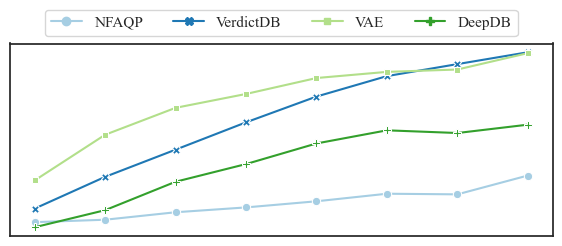

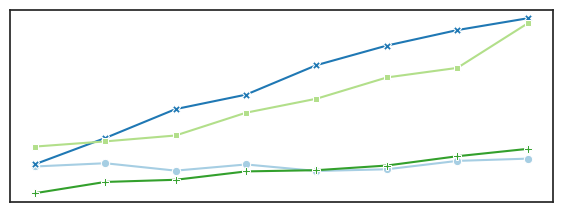

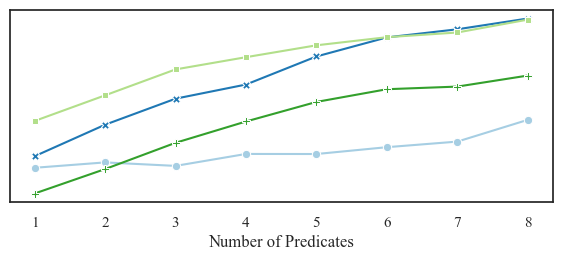

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
ratio = 3
high = 2.5
dataset = 'pm25'
df = pd.read_csv(f'/home/clb/AQP/output/flow-tiny-{dataset}-spline/eval.csv')
df['selectivity'] *= 100
methods = ['flow', 'verdict', 'vae', 'deepdb']
funcs = ['cnt', 'avg', 'sum', 'var', 'std']
methods_alias = {a: b for a, b in zip(methods, ['NFAQP', 'VerdictDB', 'VAE', 'DeepDB'])}
funcs_alias = {a: b for a, b in zip(funcs, ['COUNT', 'AVG', 'SUM', 'VAR', 'STD'])}
for idx, func in enumerate(['cnt', 'avg', 'sum']):
    x = list(range(1, df['n_predicates'].max() + 1))    # num of pred
    y = {m:[] for m in methods}
    sels = []
    for n in x:
        sub_df = df[df['n_predicates'] == n].mean()
        sels.append(sub_df['selectivity'])
        for m in methods:
            for f in funcs:
                if f != func:
                    continue;
                if m == 'deepdb' and f in ['var', 'std']:
                    continue
                err = sub_df[f'{m}_{f}_err']
                y[m].append(err)

    plot_df = []
    for m in methods:
        for a, b, s in zip(x, y[m], sels):
            plot_df.append([s, a, b, methods_alias[m]])

    plot_df = pd.DataFrame(plot_df, columns=["Selectivity", "Number of Predicates", 'Mean sMAPE', 'Methods'])


    fig = plt.figure(figsize=(int(high * ratio), high))
    sns.set(font="Times New Roman", style='white', palette="Paired")
    # sns.despine()
    latency_ax = sns.lineplot(
        data=plot_df,
        x="Number of Predicates", y="Mean sMAPE", hue="Methods", style="Methods",
        markers=True, dashes=False, errorbar=('ci', False)
    )

    # ax.set_xticks(x)
    # ax.set_xticklabels([f"{n_p} ({s:.2f}%)" for n_p, s in zip(x, sels)])
    # ax.set_xlabel("Number of Predicates  (Mean Selectivity)") # 设置x轴标签
    
    latency_ax.set_ylabel("")
    latency_ax.set_yticklabels([])

    if idx == 0:
        sns.move_legend(latency_ax, 'lower center', bbox_to_anchor=(.5, 1), ncol=4, title=None, frameon=True)
    else:
        latency_ax.get_legend().remove()
    
    if idx == 2:
        # ax.set_xticklabels([f"{n_p} ({s:.2f}%)" for n_p, s in zip(x, sels)])
        # ax.set_xlabel("Number of Predicates  (Mean Selectivity)") # 设置x轴标签
        latency_ax.set_xticks(x)
        latency_ax.set_xticklabels([f"{n_p}" for n_p, s in zip(x, sels)])
        latency_ax.set_xlabel("Number of Predicates") # 设置x轴标签
    else:
        latency_ax.set_xticks([])
        latency_ax.set_xlabel("") # 设置x轴标签
    plt.savefig(f"./vary/{func}.pdf", format="pdf", dpi=1200, bbox_inches="tight")



## 结合热力图

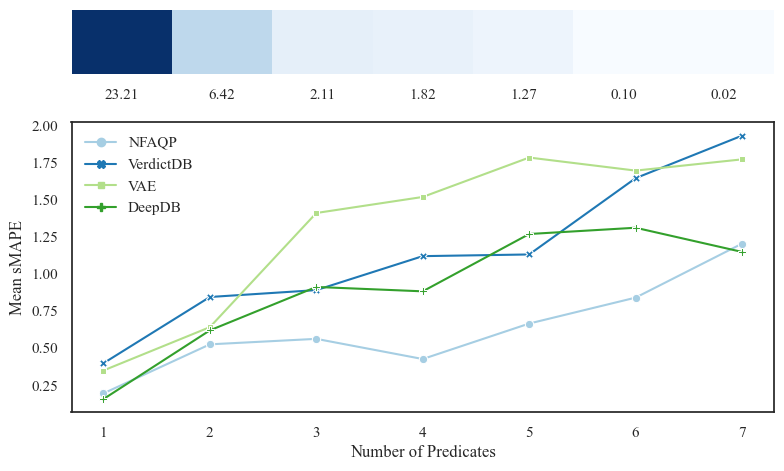

In [51]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dataset = 'flights'
df = pd.read_csv(f'/home/clb/AQP/output/flow-tiny-{dataset}-spline/eval.csv')
df['selectivity'] *= 100
methods = ['flow', 'verdict', 'vae', 'deepdb']
funcs = ['cnt', 'avg', 'sum', 'var', 'std']
methods_alias = {a: b for a, b in zip(methods, ['NFAQP', 'VerdictDB', 'VAE', 'DeepDB'])}
funcs_alias = {a: b for a, b in zip(funcs, ['COUNT', 'AVG', 'SUM', 'VAR', 'STD'])}
x = list(range(1, df['n_predicates'].max() + 1))
y = {m:[] for m in methods}
sels = []
for n in x:
    sub_df = df[df['n_predicates'] == n].mean()
    sels.append(sub_df['selectivity'])
    for m in methods:
        for f in funcs:
            if f != 'sum':
                continue;
            if m == 'deepdb' and f in ['var', 'std']:
                continue
            err = sub_df[f'{m}_{f}_err']
            y[m].append(err)

plot_df = []
for m in methods:
    for a, b, s in zip(x, y[m], sels):
        plot_df.append([s, a, b, methods_alias[m]])

plot_df = pd.DataFrame(plot_df, columns=["Selectivity", "Number of Predicates", 'Mean sMAPE', 'Methods'])



width = 12
ratio = 0.4
# fig = plt.figure(figsize=(width, int(width * ratio)))
fig = plt.figure(figsize=(8, 6))
gs = fig.add_gridspec(5, 1)
# 绘制折线图

ax2 = fig.add_subplot(gs[1, :])
ax1 = fig.add_subplot(gs[2:, :])

sns.set(font="Times New Roman", style='white', palette="Paired")
# sns.despine()
latency_ax = sns.lineplot(
    data=plot_df,
    x="Number of Predicates", y="Mean sMAPE", hue="Methods", style="Methods",
    markers=True, dashes=False, errorbar=('ci', False), ax=ax1,
)
# sns.move_legend(ax, 'lower center', bbox_to_anchor=(.5, 1), ncol=4, title=None, frameon=False)
sns.move_legend(latency_ax, 'best', title=None, frameon=False)

sns.heatmap(np.expand_dims(sels, axis=0), cmap='Blues', cbar=False, ax=ax2, xticklabels=[f"{s:.2f}" for s in sels])
# 隐藏第二个 y 轴的坐标轴
ax2.set_yticks([])
plt.tight_layout()
plt.savefig(f"{dataset}_vary_n_predicates.pdf", format="pdf", dpi=1200, bbox_inches="tight")

In [48]:
[f"{s:.2f}" for s in sels]

['23.21', '6.42', '2.11', '1.82', '1.27', '0.10', '0.02']

In [24]:
img = np.array(sels) / 100.0
img = np.reshape(img, (1, -1))

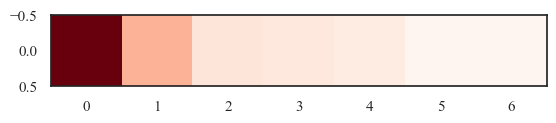

In [26]:
plt.imshow(img, cmap='Reds')

<AxesSubplot:xlabel='year', ylabel='month'>

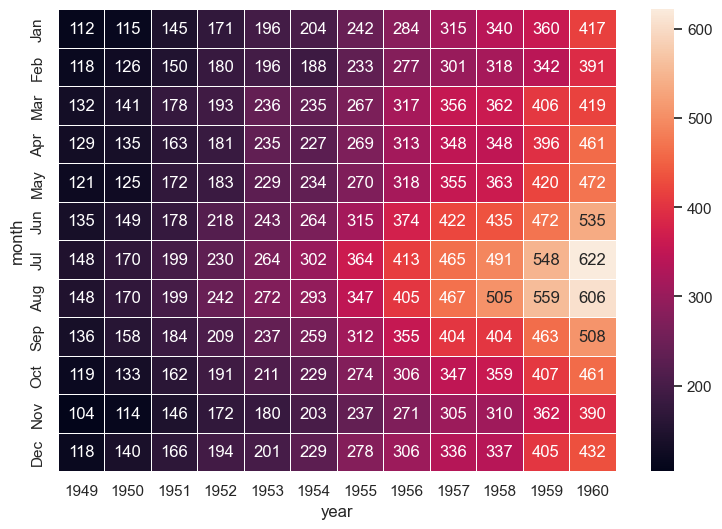

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

# Load the example flights dataset and convert to long-form
flights_long = sns.load_dataset("flights")
flights = flights_long.pivot("month", "year", "passengers")

# Draw a heatmap with the numeric values in each cell
f, latency_ax = plt.subplots(figsize=(9, 6))
sns.heatmap(flights, annot=True, fmt="d", linewidths=.5, ax=latency_ax)